## Business Case: Retail Co - Confidence Interval and CLT


### Problem Statement:
The Management team at Retail Co. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

import statistics
from scipy.stats import norm

In [2]:
#Reading input file

df = pd.read_csv('D:\\Scaler\\Scaler\\Probability & Stats\\Business Case\\walmart_data.csv')

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
df.duplicated().sum()

0

### 1. Analyzing basic metrics 

#### 1.1	Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [6]:
df.shape

(550068, 10)

In [7]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
# Converting gender, age, city_category, stay_in_current_city_years and marital status into categorical data


In [10]:
obj_to_cat = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
for i in obj_to_cat:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


In [11]:
cols = ['User_ID','Product_ID']
for col_name in cols:
    df[col_name] = df[col_name].astype("category")

df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 17.6 MB


In [12]:
#Statistical Summary

df.describe()

,Occupation,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000
mean,8.076707,5.404270,9263.968713
std,6.522660,3.936211,5023.065394
min,0.000000,1.000000,12.000000
25%,2.000000,1.000000,5823.000000
50%,7.000000,5.000000,8047.000000
75%,14.000000,8.000000,12054.000000
max,20.000000,20.000000,23961.000000


In [13]:
df.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


#### 1.1 Observations
1. There are 5,50,068 rows and 10 columns in the data.
2. There are no null values.
3. Range of purchase amount is 12 dollars to 23961 dollars.
4. Mean purchase amount is 9264 dollars.
5. Median purchase amount is 8047 dollars.
6. Standard deviation of purchase amount is 5023 dollars.
7. Inter quartile range of purchase amount is 5823 to 12054 dollars.

##### Value counts and unique attributes 

In [14]:
# Unique Atrributes

df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [15]:
# Value_counts for Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status & # Product_Category

Categorical_Columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
                    'Marital_Status', 'Product_Category']
df[Categorical_Columns].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

#### 1.2 Observations:
1. ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
    1.1 People in age group 26–35 make more purchases than any other age group.
2. 75% of the users are Male and 25% are Female
3. 60% Single, 40% Married
    3.1 Unmarried people make more purchases than married people
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. People of city category B make more purchases than other city categories
6. Total of 20 product categories are there
    6.1 Product categories 5, 1 and 8 sell more than other categories
    6.2 Product categories 17 and 9 sell the least
7. There are 20 differnent types of occupations in the city

#### Observations:
1. Mostly features are categorical and not much correlation can be observed from above graphs
2. There’s a weak negative correlation between product category and purchase amount.

#### **************************************************************************************************************************************************************

In [16]:
# Checking for missing values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### Observations:
1. Purchase columns contains 2677 outliers. This is 0.49% of total number of entries.
2. There are no missing values in any column.

#### 1.3 Visual Analysis - Univariate & Bivariate
      a) For continuous variable(s): Distplot, countplot, histogram for univariate analysis
      b) For categorical variable(s): Boxplot
      c) For correlation: Heatmaps, Pairplots

#### a) For continuous variable(s): Distplot, countplot, histogram for univariate analysis
#### Understanding the distribution of data and detecting outlies for continuous variables

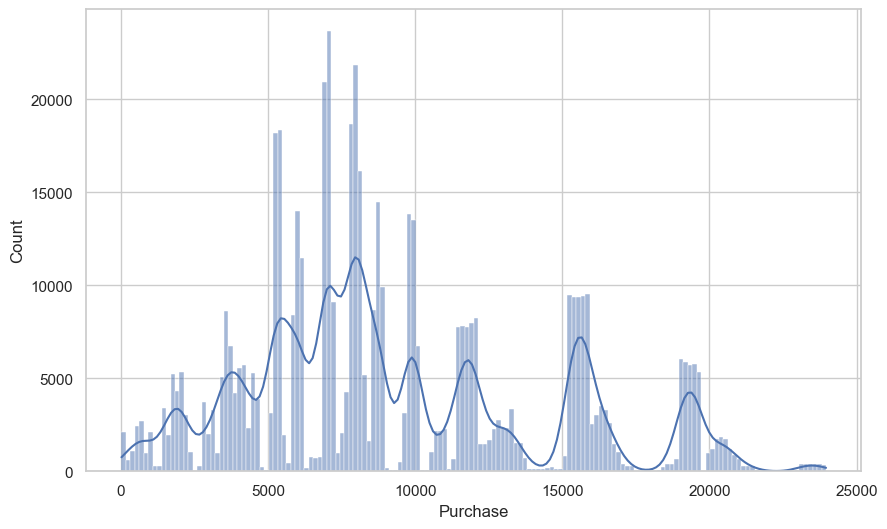

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

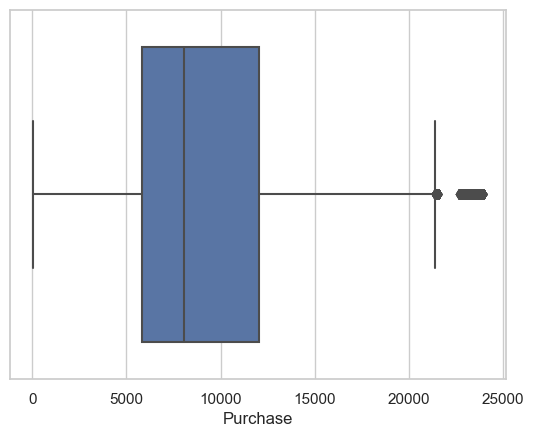

In [18]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

<Axes: xlabel='Purchase', ylabel='Density'>

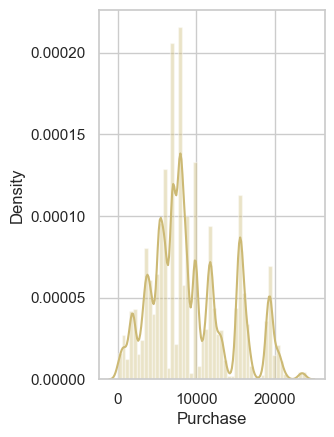

In [19]:
plt.subplot(1,2,2)
sns.distplot(df["Purchase"],color='y')

##### b)  For categorical variable(s): Boxplot
##### Understanding the distribution of data for the categorical variables - Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status and Product_Category

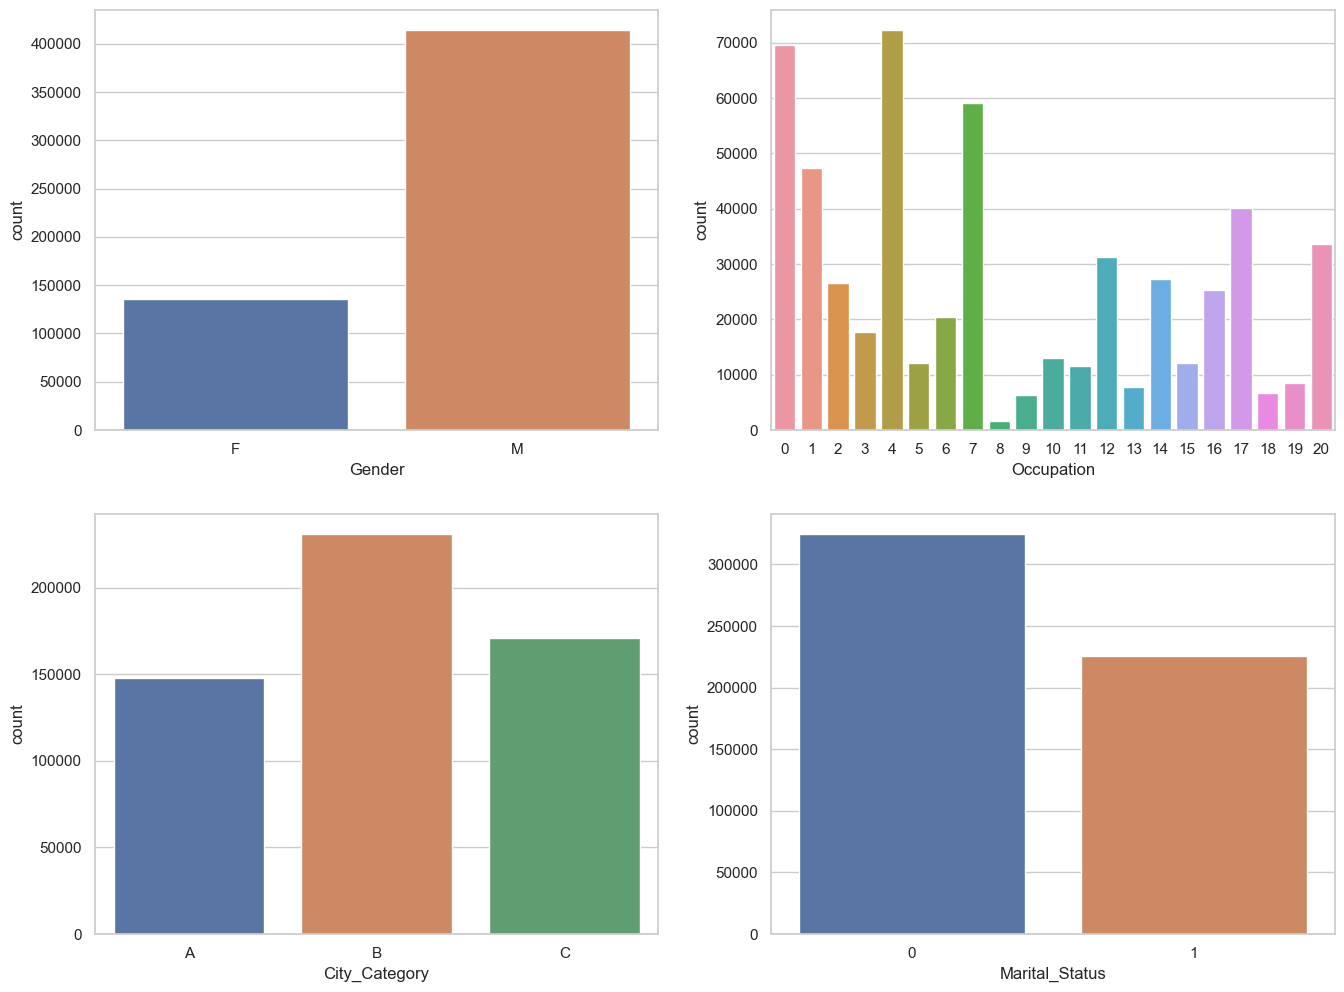

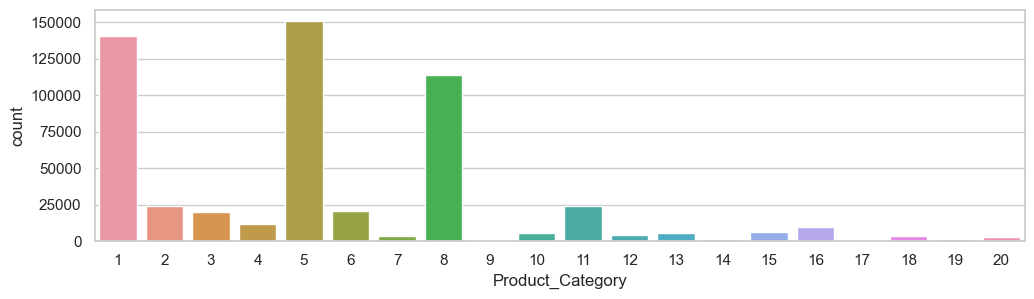

In [20]:
Categorical_Columns = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='Product_Category')
plt.show()

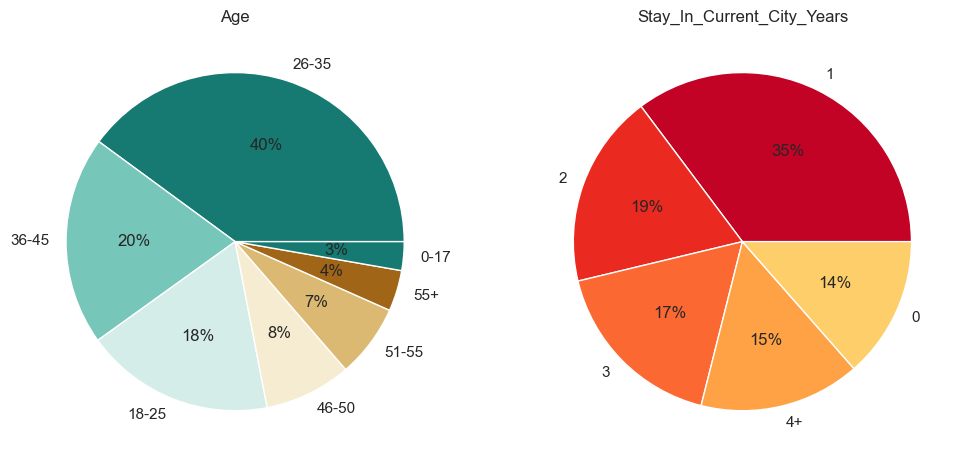

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

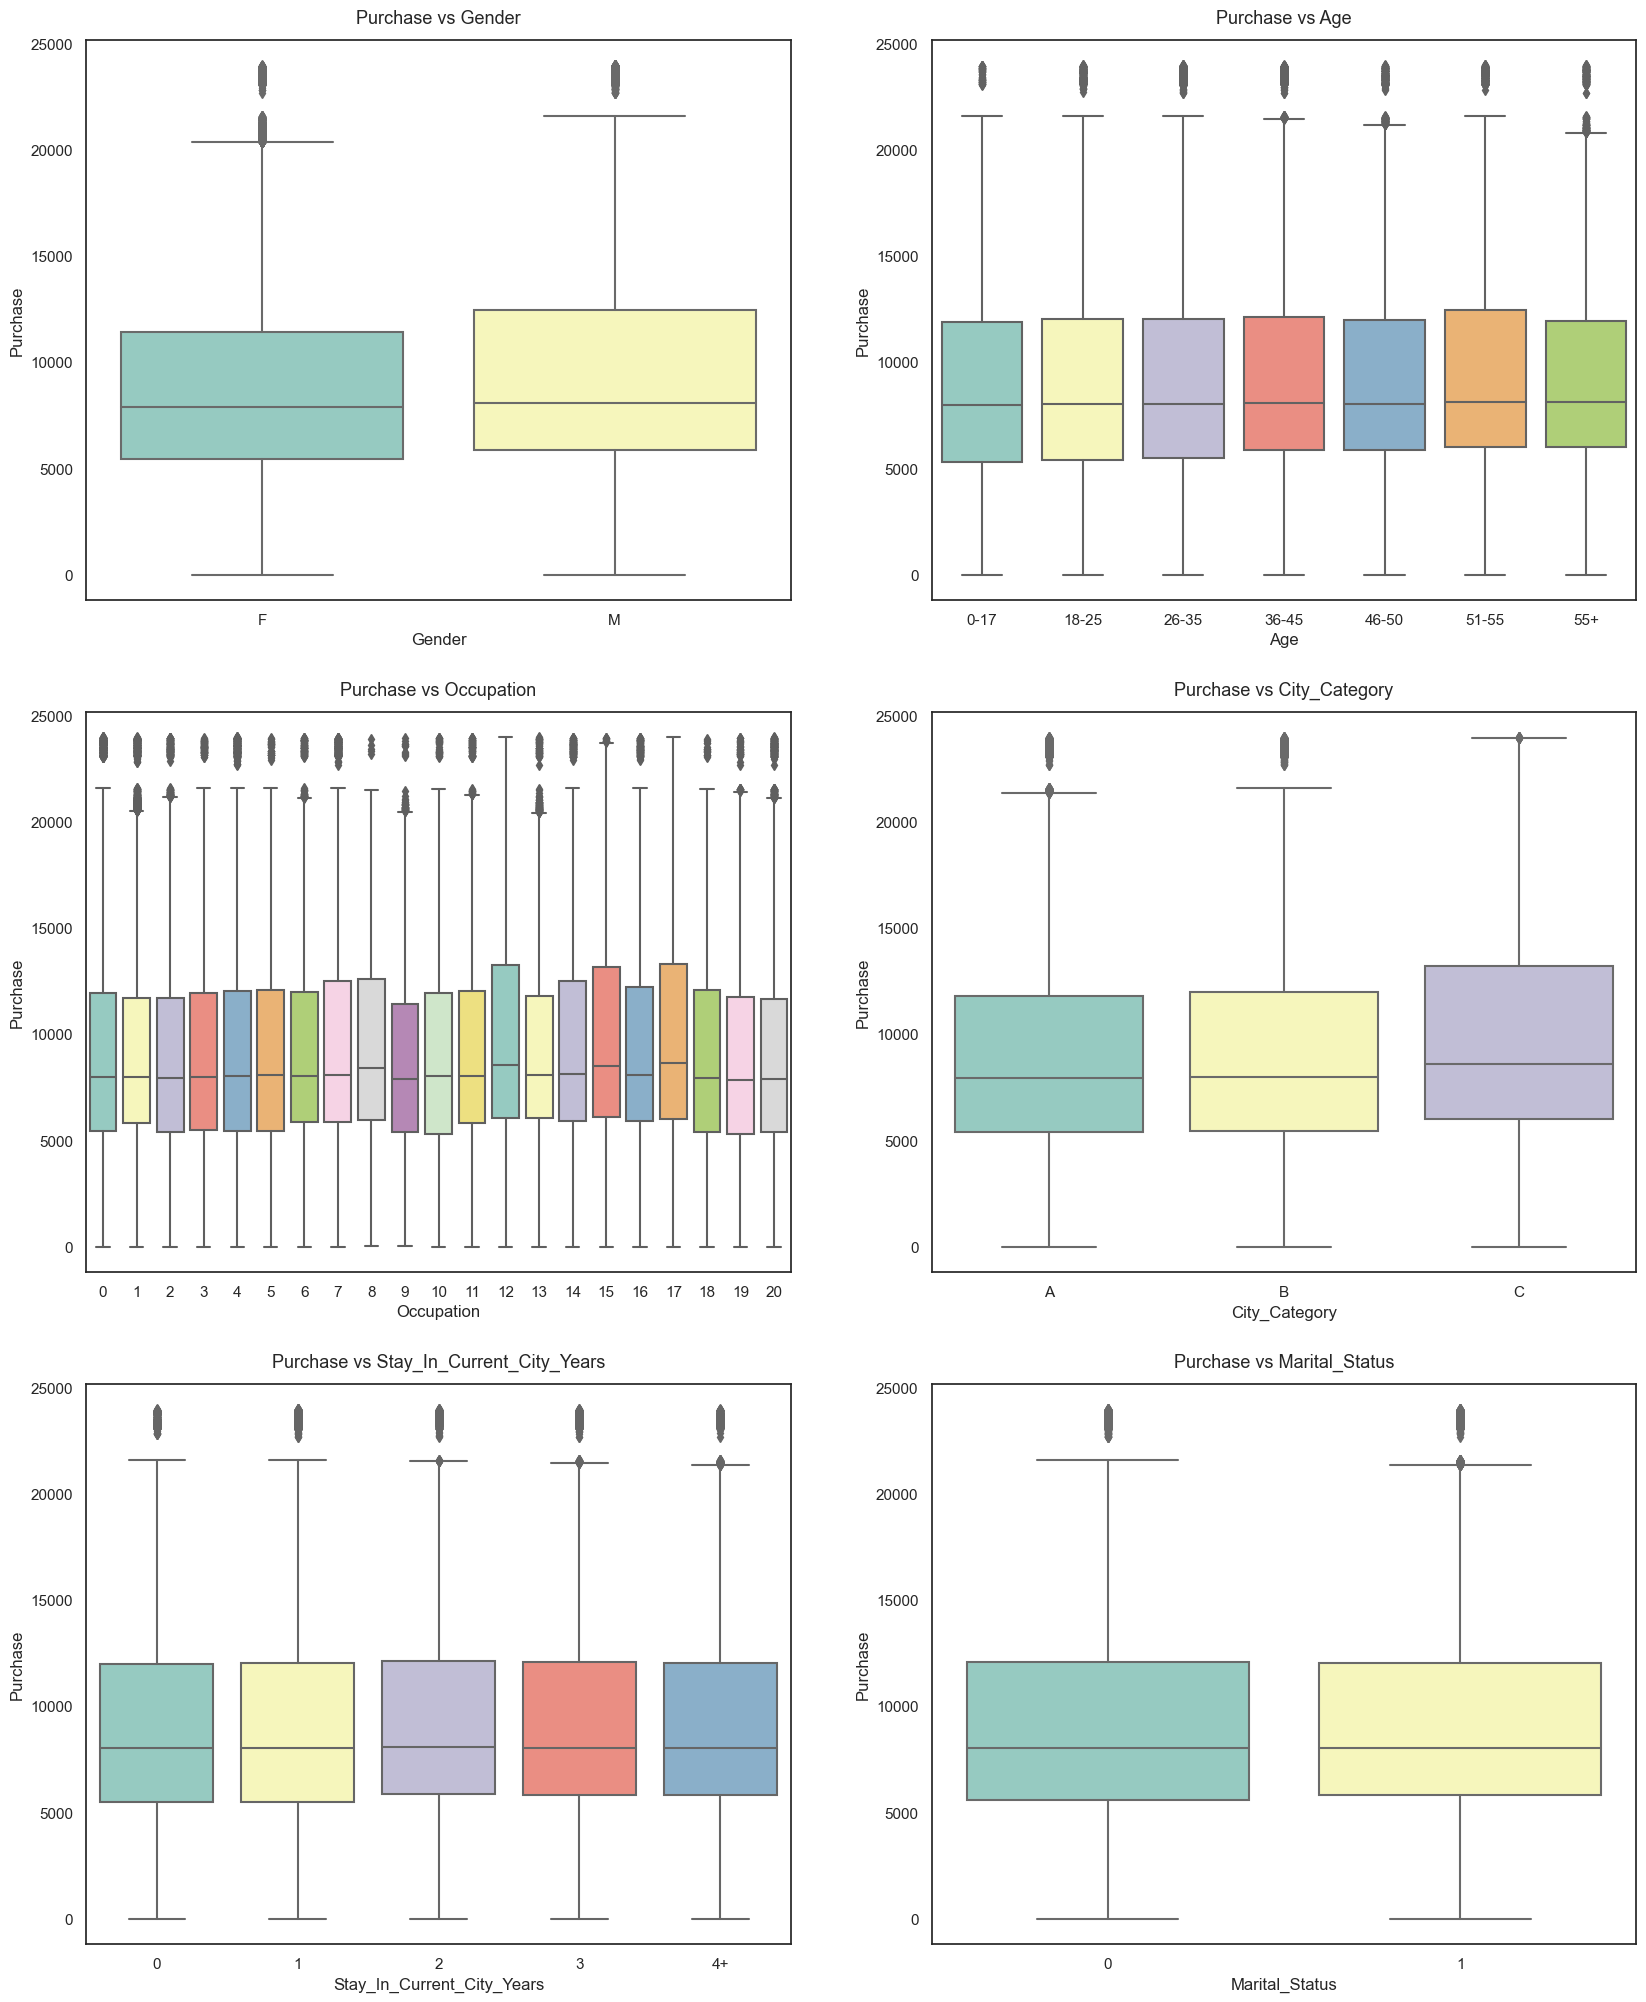

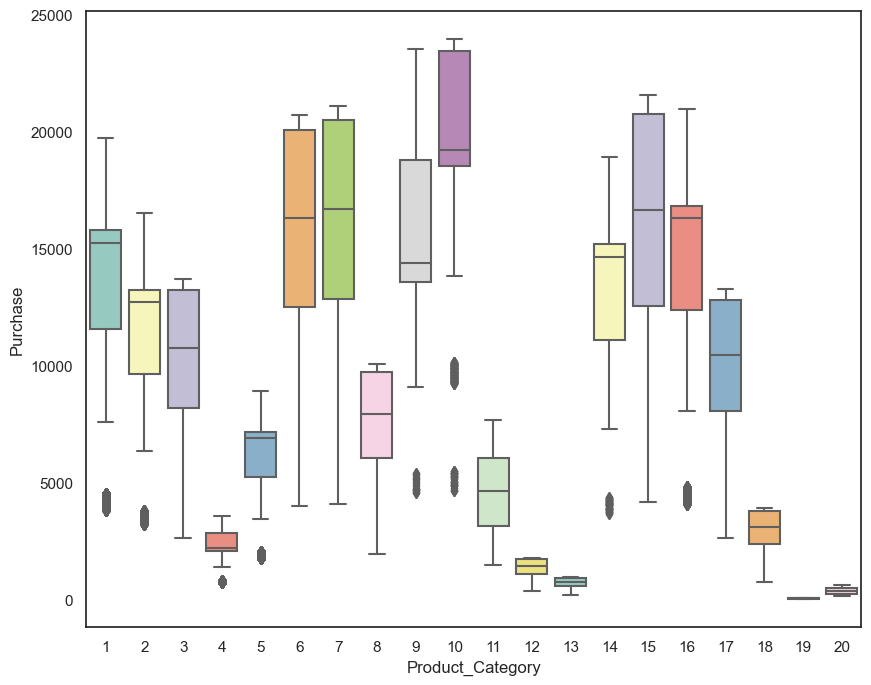

In [22]:
#Bi-variate Analysis

attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

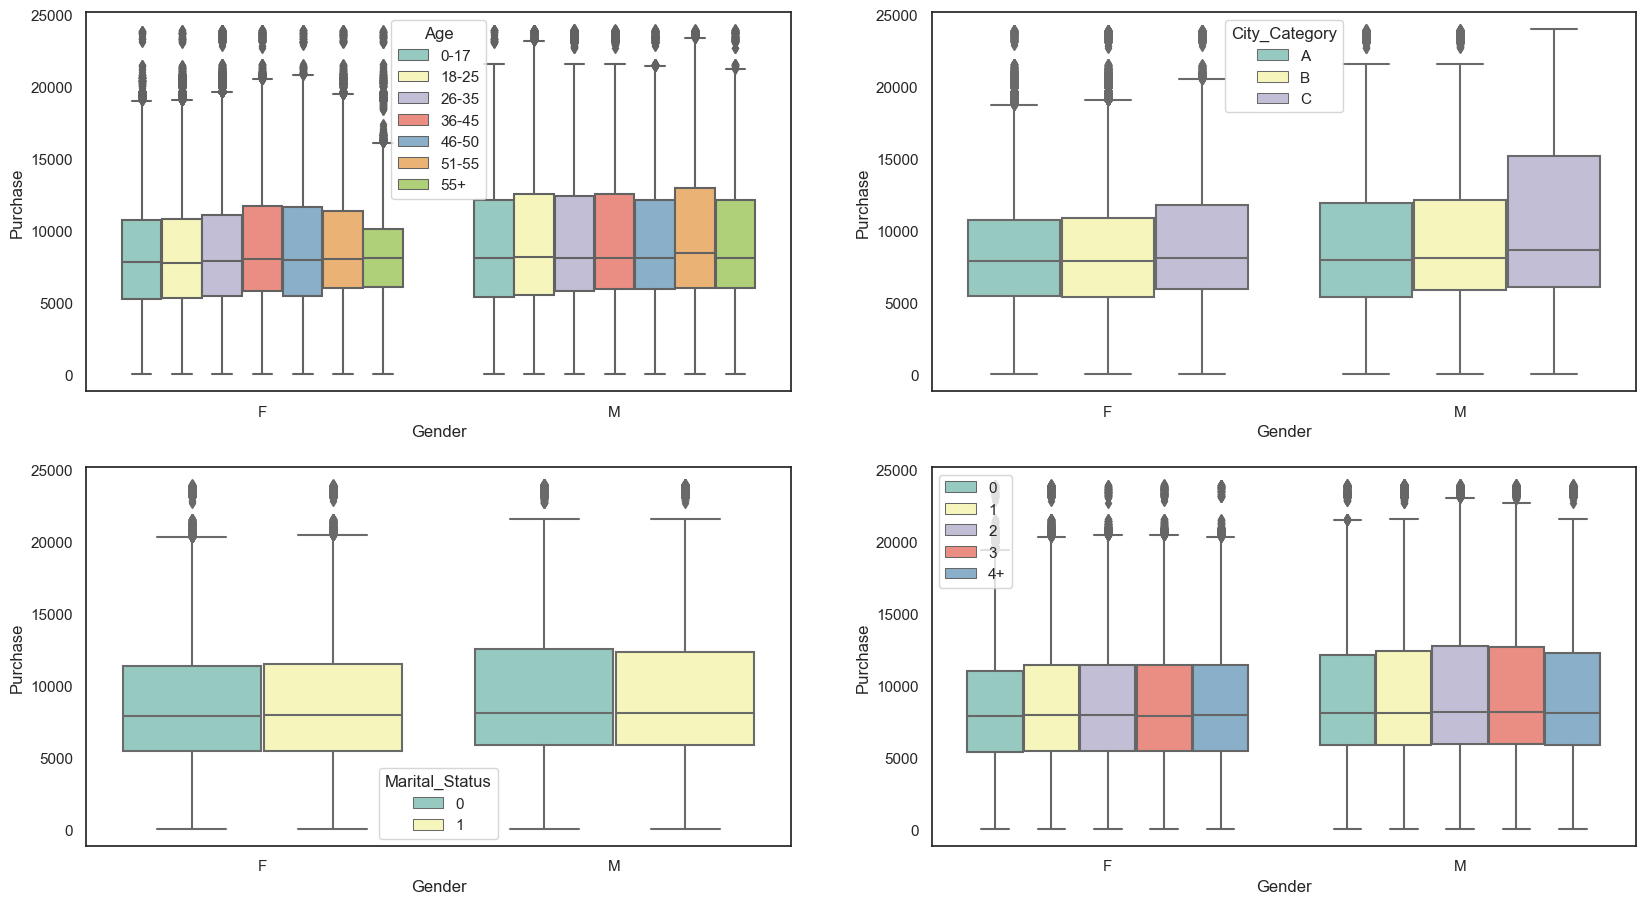

In [23]:
#Multivariate Analysis

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

#### c) For correlation: Heatmaps, Pairplots

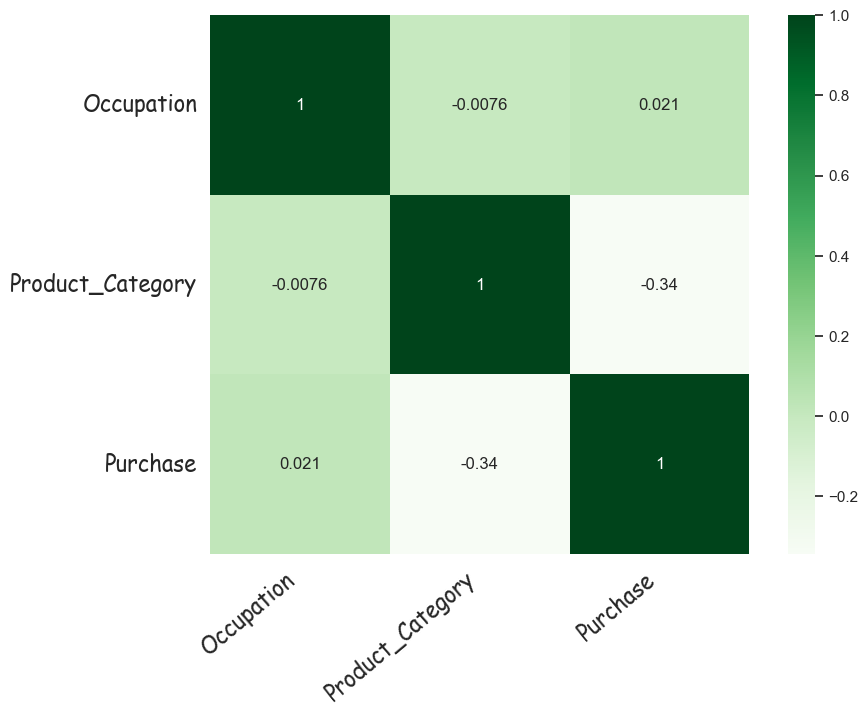

In [24]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

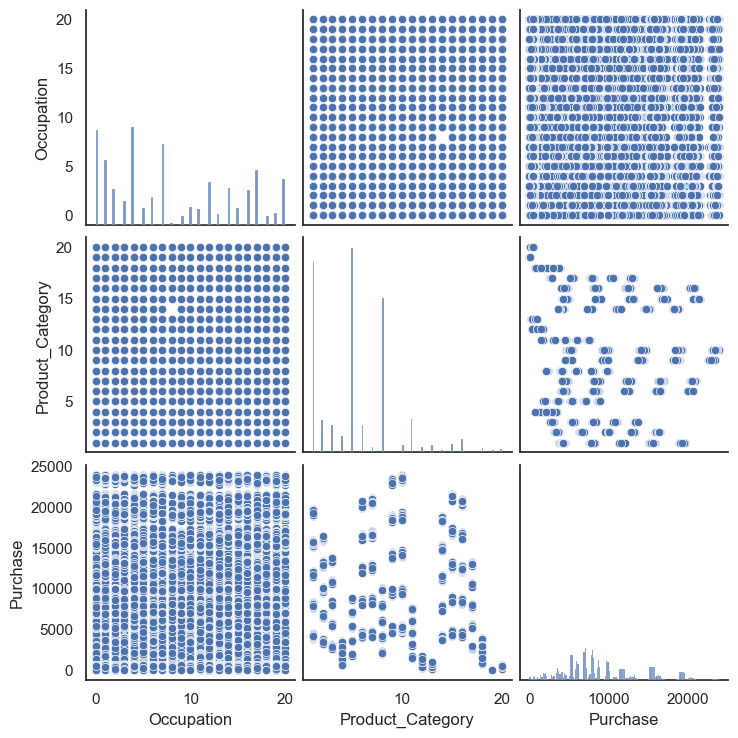

In [25]:
sns.pairplot(df)

#### Observations:

1. Most of the users are Male
2. There are 20 different types of Occupation and Product_Category
3. More users belong to B City_Category
4. More users are Single as compare to Married
5. Product_Category: 1, 5, 8, & 11 have highest purchasing frequency
6. More puchases have been made by males than females.
7. People of age group 26–35 have made the maximum number of purchases.
8. People in cities of category B have made maximum number of purchases.
9. People who have stayed in their city for a year have made the maximum number of purchases.
10. Unmarried people have made more purchases than married peole.
11. Products of category 1, 5 and 8 sold most frequently.
12. Purchases of amount (5000, 10000] were maximum in number.
13. People of occupation 0,4 and 7 have made more purchases than other occupations.
14. People of occupation 8 have made least purchases.
15. Both males and females of city category B make more purchases compared to city categories A and C.
16. Females purchase products of category 4, 11, 15, 17 and 18 less often.
17. Most popular product category among males is 1.
18. Most popular product category among females is 5. It is popular among male customers as well.
19. Females with occupation 0–10 made more purchases than females with occupations 11–20.

#### 4.1 Are women spending more money per transaction than men? Why or Why not? 

In [26]:
# Average amount spend per customer for Male and Female
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [27]:
# Gender wise value counts in avg_amt_df
amt_df['Gender'].value_counts()

F    5891
M    5891
Name: Gender, dtype: int64

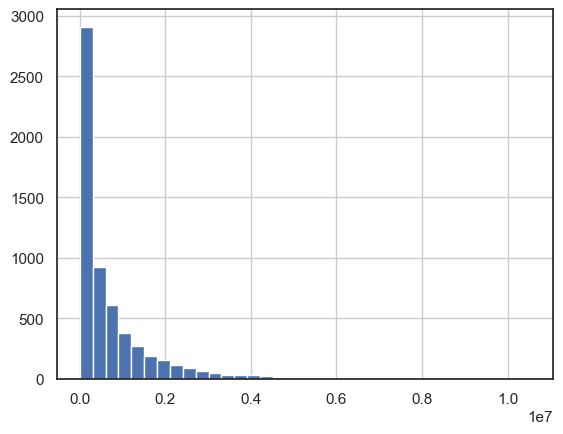

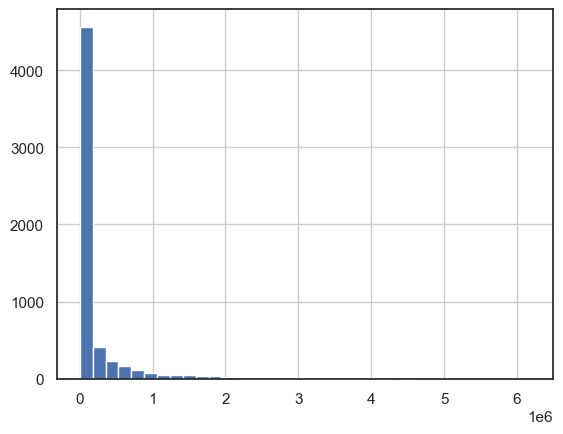

In [28]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [29]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 663653.05
Average amount spend by Female customers: 201363.54


#### Observation:

As Average amount spend by Male customers is more than that of female customers, Male customers spend more money per transaction than female customers

#### 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

In [30]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [31]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

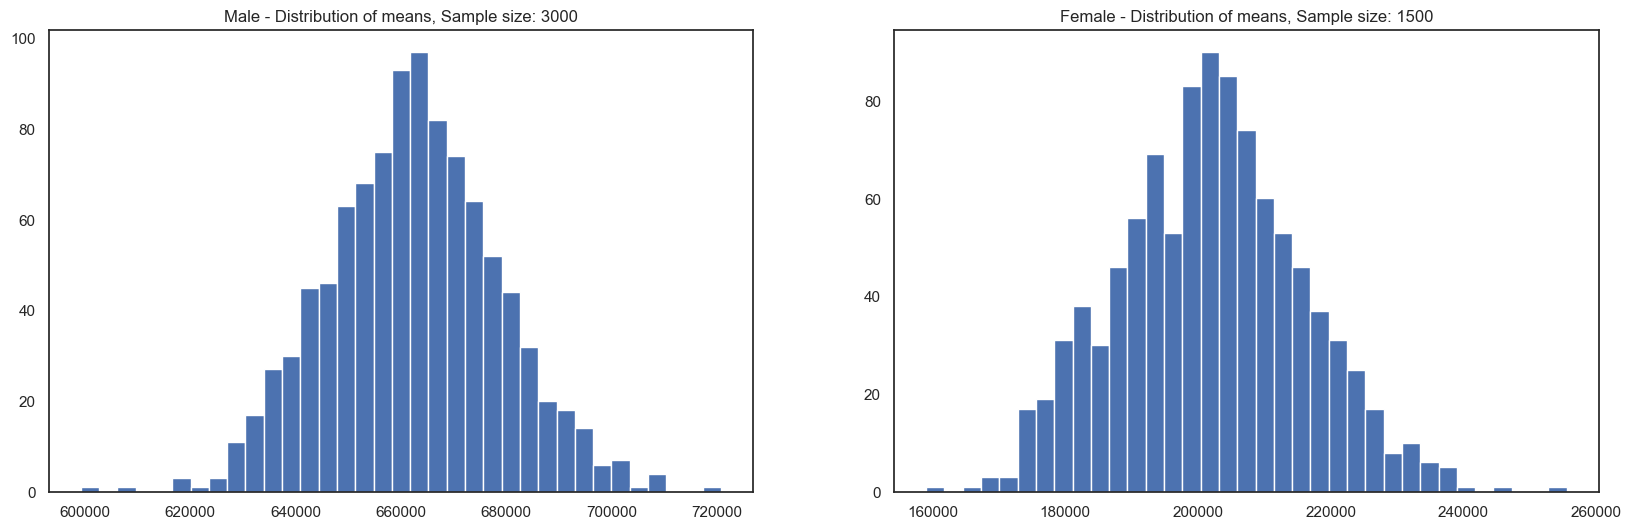

In [32]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [33]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 662384.67
Population mean - Mean of sample means of amount spend for Female: 201851.67

Male - Sample mean: 663653.05 Sample std: 933096.80
Female - Sample mean: 201363.54 Sample std: 535828.17


#### Observation

Using the Central Limit Theorem for the population we can say that:

Average amount spend by male customers is 664341.60
Average amount spend by female customers is 201424.37

In [34]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (639825.01, 687481.08)
Female confidence interval of means: (187680.36, 215046.73)


#### Observations:
Now we can infer about the population that, 95% of the time:

Average amount spent by male customers will lie in between: (639,825.01, 687,481.08)
Average amount spent by female customers will lie in between: (187,680.36, 215,046.73)

* 95% confidence interval for purchase amounts of females is less than males without any intersection.
* We can say with 95% confidence that females spend less than males.

#### 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

In [35]:
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')
    
    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [36]:
retail_data_smp_male = df[df['Gender'] == 'M']['Purchase']
retail_data_smp_female = df[df['Gender'] == 'F']['Purchase']
print("Male Customers : ",retail_data_smp_male.shape[0])
print("Female Customers : ",retail_data_smp_female.shape[0])

Male Customers :  414259
Female Customers :  135809


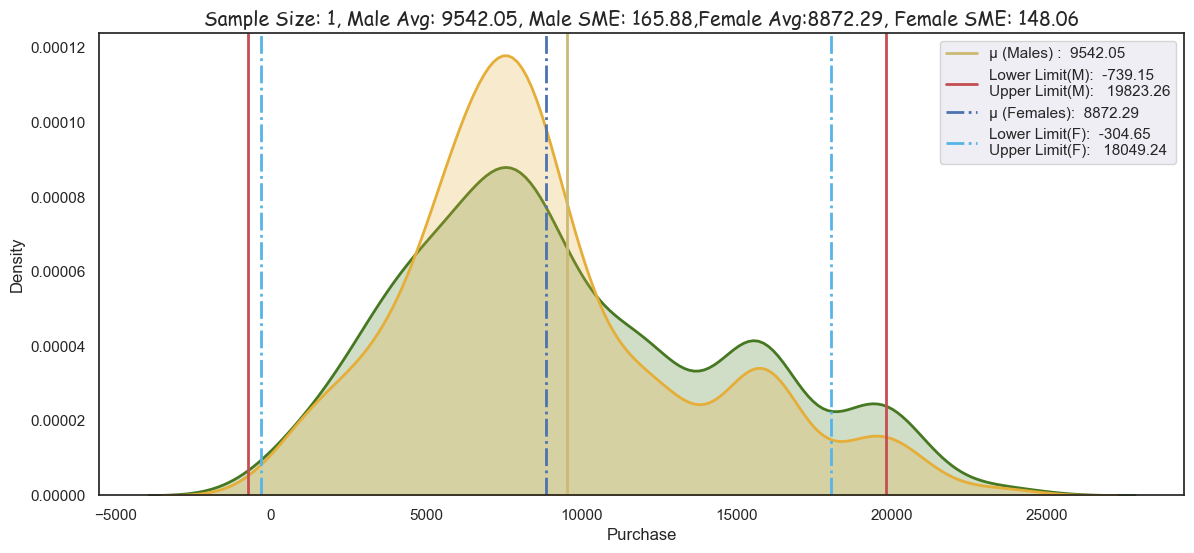

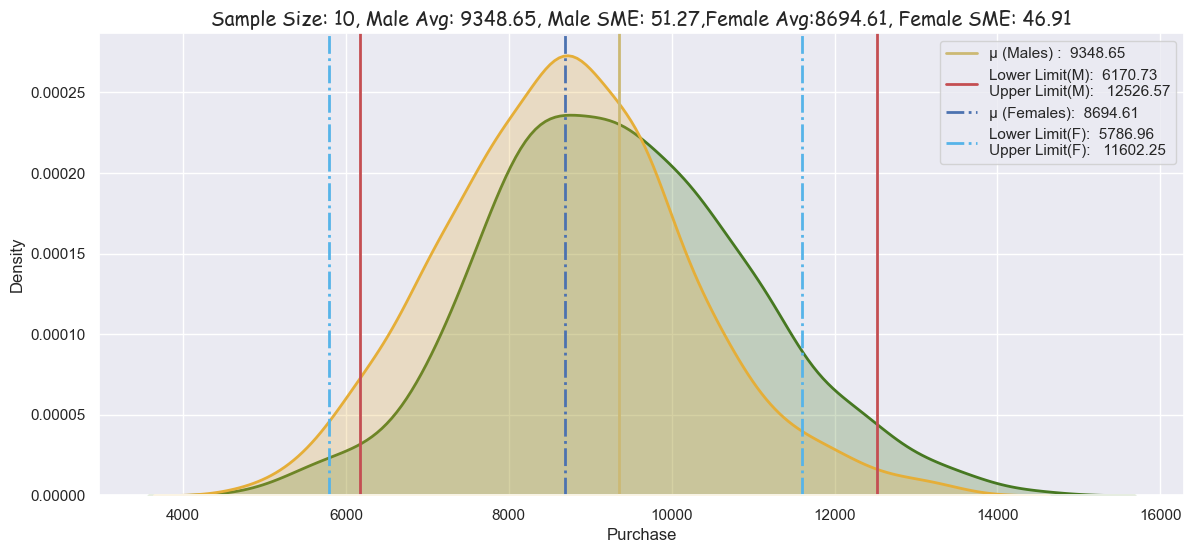

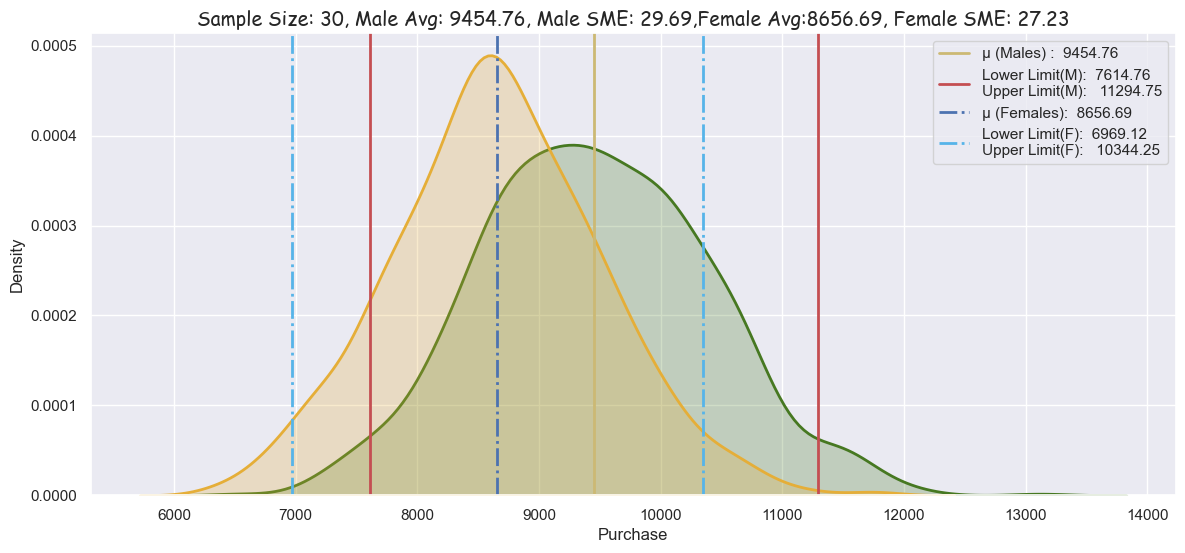

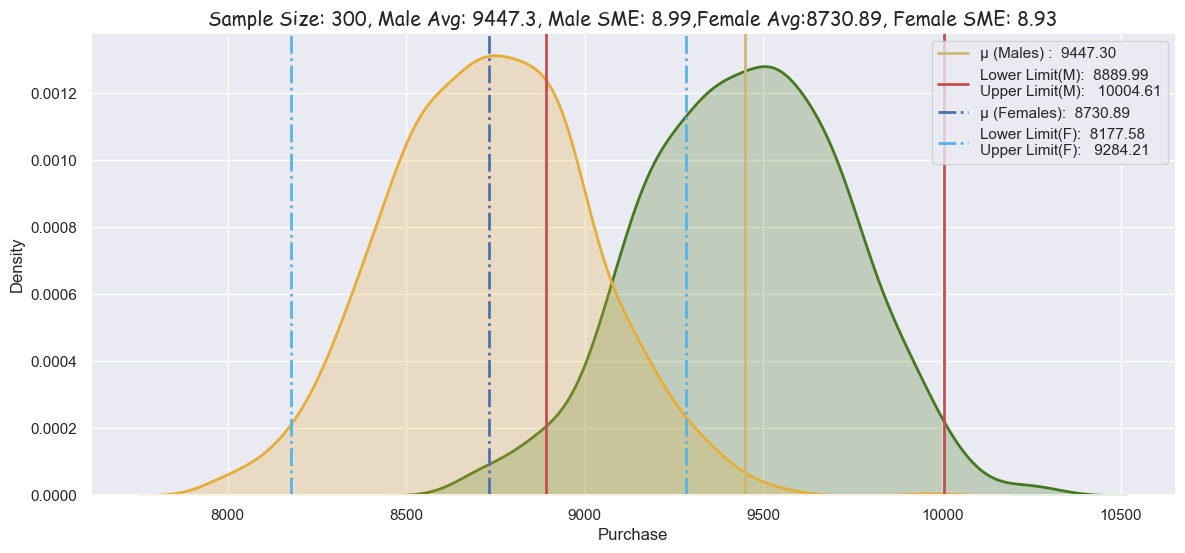

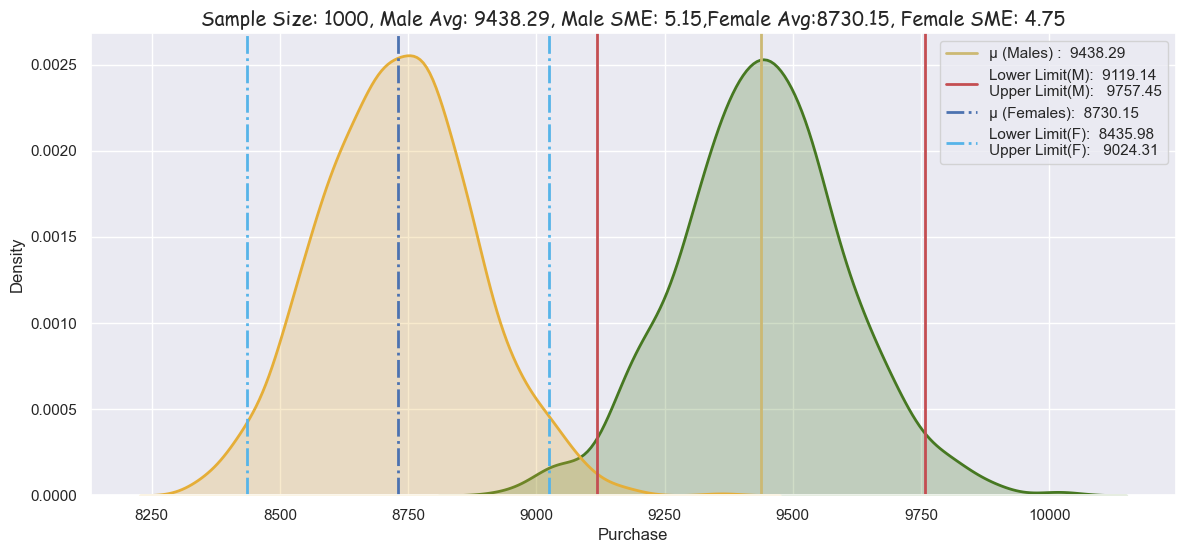

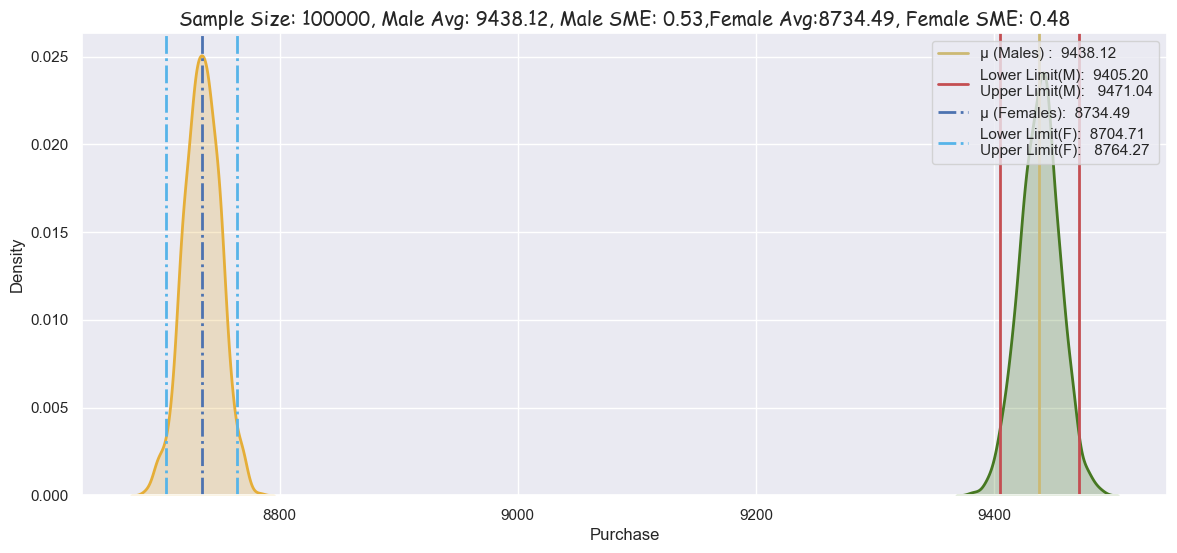

NameError: name 'overlap' is not defined

In [37]:
# CLT Analysis for mean purchase with confidence 95% - Based on Gender

itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),95]]), axis=0)

overlap_95 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_95], axis=0)

In [ ]:
overlap_95.loc[(overlap_95['Gender'] == 'M') & (overlap_95['Sample_Size'] >= 300)]

In [ ]:
overlap_95.loc[(overlap_95['Gender'] == 'F') & (overlap_95['Sample_Size'] >= 300)]

#### Observations:
Comparison of Confidence Intervals Overlap:

For both males and females, the confidence intervals at a 95% confidence level are provided for different sample sizes.
By comparing the upper and lower limits of the confidence intervals for males and females, we can observe the extent of overlap between the intervals.
Observations on Overlapping Confidence Intervals:

As sample sizes increase for both genders, the width of the confidence intervals decreases, indicating higher precision in estimating the population mean purchase amounts.
Despite the decreasing width of the confidence intervals with larger sample sizes, there is still some overlap between the intervals for males and females.
The extent of overlap diminishes with larger sample sizes, suggesting that the mean purchase amounts for males and females become more distinct as sample sizes increase.
However, even with large sample sizes (e.g., 100,000), there may still be a small degree of overlap between the confidence intervals, indicating some uncertainty in distinguishing between male and female spending patterns.
Implications of Overlapping Confidence Intervals:

The overlap between confidence intervals suggests that there may not be a statistically significant difference in the mean purchase amounts between males and females, especially for larger sample sizes.
While there may be trends indicating differences in spending between genders, the overlap in confidence intervals implies that these differences may not be substantial or consistent across all observations.
Walmart can use this insight to develop marketing strategies and product offerings that cater to the preferences of both male and female customers, rather than focusing exclusively on one gender.

#### 4.4 Analysis based on Married vs Unmarried 

In [39]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum() 
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000001,1,0
2,1000002,0,810472
3,1000002,1,0
4,1000003,0,341635
...,...,...,...
11777,1006038,1,0
11778,1006039,0,0
11779,1006039,1,590319
11780,1006040,0,1653299


In [40]:
amt_df['Marital_Status'].value_counts()

0    5891
1    5891
Name: Marital_Status, dtype: int64

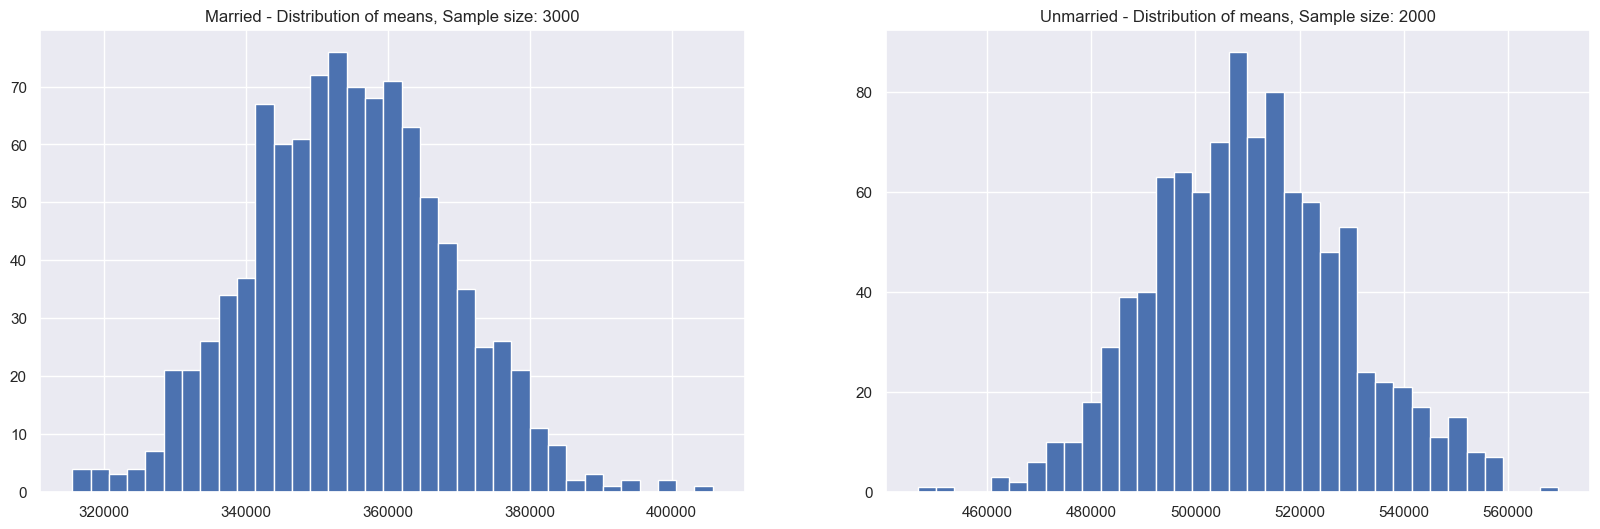

Population mean - Mean of sample means of amount spend for Married: 354543.48
Population mean - Mean of sample means of amount spend for Unmarried: 510449.54

Married - Sample mean: 354249.75 Sample std: 735314.88
Unmarried - Sample mean: 510766.84 Sample std: 843632.94


In [41]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [42]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (335472.38, 373027.13)
Unmarried confidence interval of means: (489223.40, 532310.28)


In [44]:
def bootstrapping_m_vs_um(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [ ]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.99,no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"Sample Size: {smp_siz},Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

In [45]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [46]:
df.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,281.0,9174.241993,4792.467205,473.0,5444.0,7972.0,12198.0,23655.0
Married,219.0,9328.082192,5211.817007,26.0,6010.0,7981.0,12374.5,23889.0


In [47]:
retail_data_smp_married = df[df['Marital_Status'] == 'Married']['Purchase']
retail_data_smp_unmarried = df[df['Marital_Status'] == 'Unmarried']['Purchase']

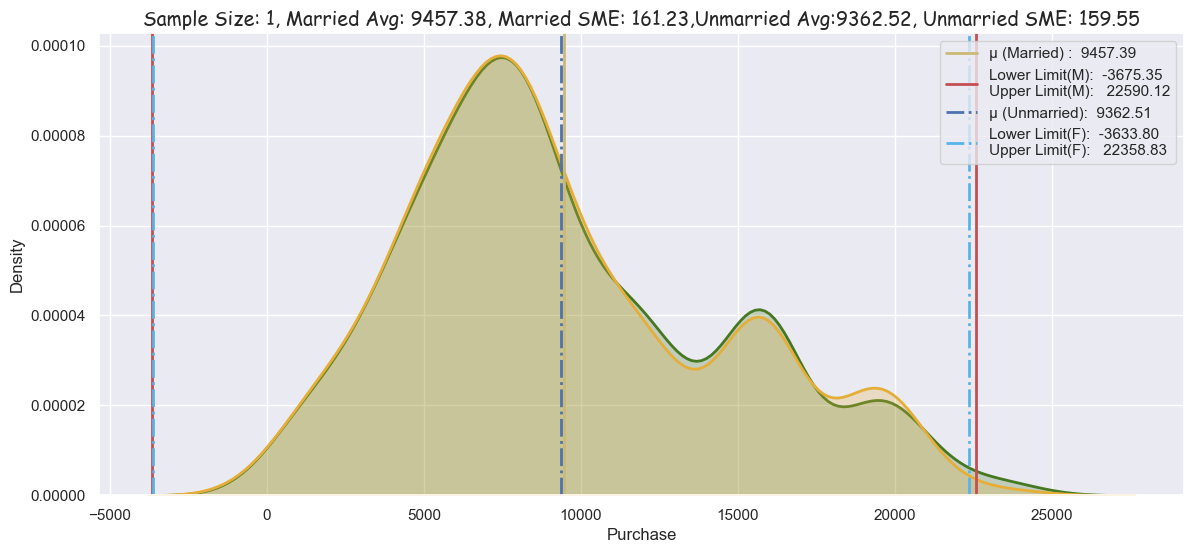

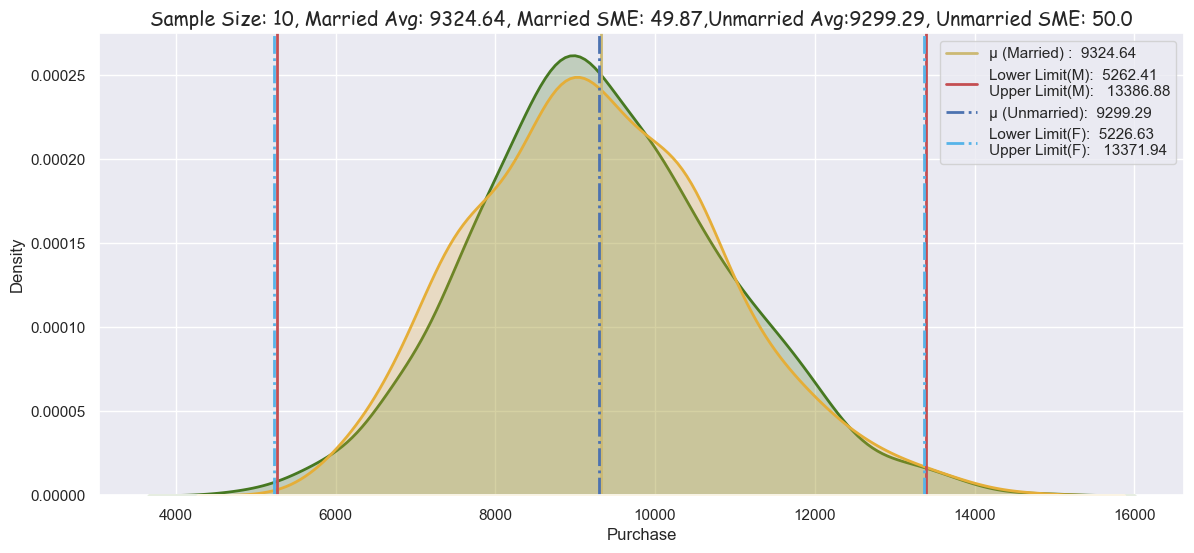

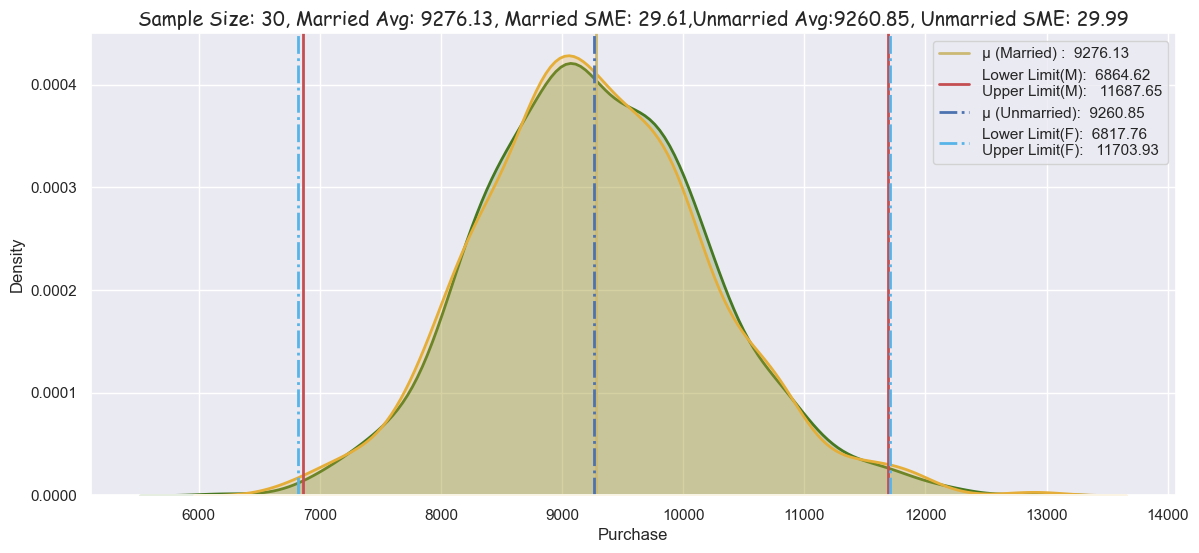

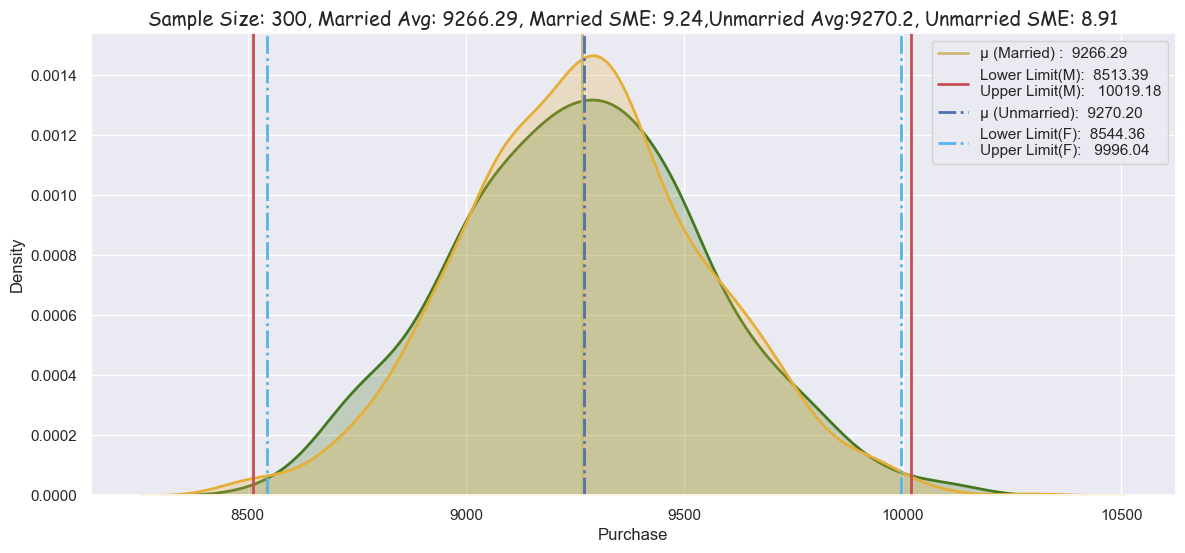

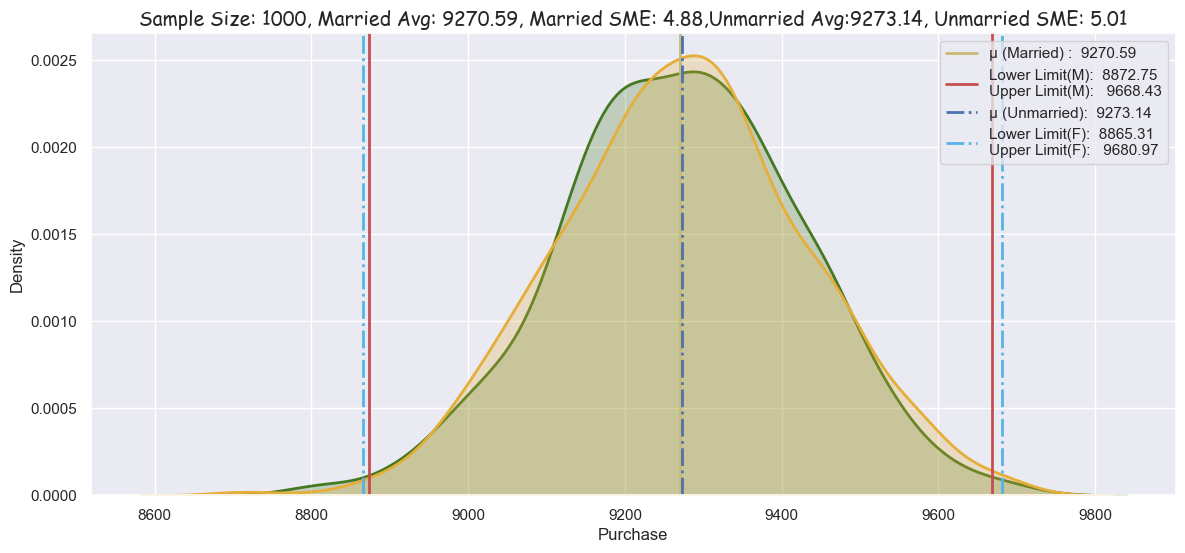

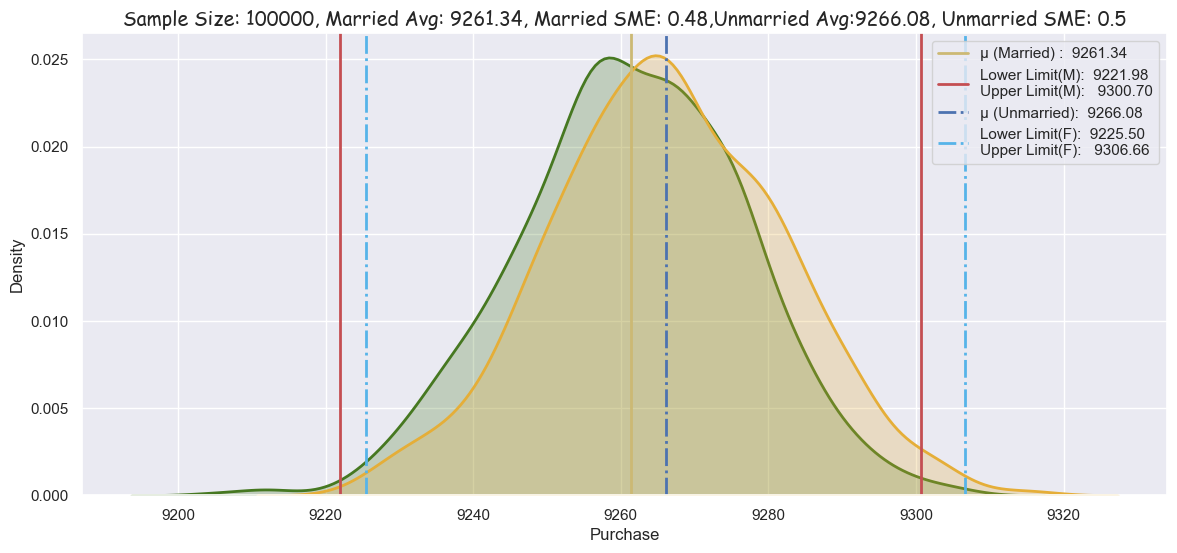

In [48]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_m_vs_um(retail_data_smp_married,retail_data_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),99]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [49]:
overlap.head()

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
0,Married,-3675.35,22590.12,1,"[-3675.35, 22590.12]",26265.47,99
1,Unmarried,-3633.8,22358.83,1,"[-3633.8, 22358.83]",25992.63,99
2,Married,5262.41,13386.88,10,"[5262.41, 13386.88]",8124.47,99
3,Unmarried,5226.63,13371.94,10,"[5226.63, 13371.94]",8145.31,99
4,Married,6864.62,11687.65,30,"[6864.62, 11687.65]",4823.03,99


In [50]:
overlap.loc[(overlap['Marital_Status'] == 'Married') & (overlap['Sample_Size'] >= 300)]

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
6,Married,8513.39,10019.18,300,"[8513.39, 10019.18]",1505.79,99
8,Married,8872.75,9668.43,1000,"[8872.75, 9668.43]",795.68,99
10,Married,9221.98,9300.7,100000,"[9221.98, 9300.7]",78.72,99


In [51]:
overlap.loc[(overlap['Marital_Status'] == 'Unmarried') & (overlap['Sample_Size'] >= 300)]

,Marital_Status,Lower_limit,Upper_limit,Sample_Size,CI,Range,Confidence_pct
7,Unmarried,8544.36,9996.04,300,"[8544.36, 9996.04]",1451.68,99
9,Unmarried,8865.31,9680.97,1000,"[8865.31, 9680.97]",815.66,99
11,Unmarried,9225.5,9306.66,100000,"[9225.5, 9306.66]",81.16,99


#### Observations:
Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.


#### 4.5 Analysis based on Age

In [52]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000001,18-25,0
2,1000001,26-35,0
3,1000001,36-45,0
4,1000001,46-50,0
...,...,...,...
41232,1006040,26-35,1653299
41233,1006040,36-45,0
41234,1006040,46-50,0
41235,1006040,51-55,0


In [53]:
amt_df['Age'].value_counts()

0-17     5891
18-25    5891
26-35    5891
36-45    5891
46-50    5891
51-55    5891
55+      5891
Name: Age, dtype: int64

In [54]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [55]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (325226.35, 364561.66)
For age 36-45 --> confidence interval of means: (159958.40, 188563.04)
For age 18-25 --> confidence interval of means: (142318.86, 167933.62)
For age 46-50 --> confidence interval of means: (62258.26, 80618.47)
For age 51-55 --> confidence interval of means: (54450.95, 70179.72)
For age 55+ --> confidence interval of means: (28893.83, 39266.89)
For age 0-17 --> confidence interval of means: (18402.36, 27400.79)


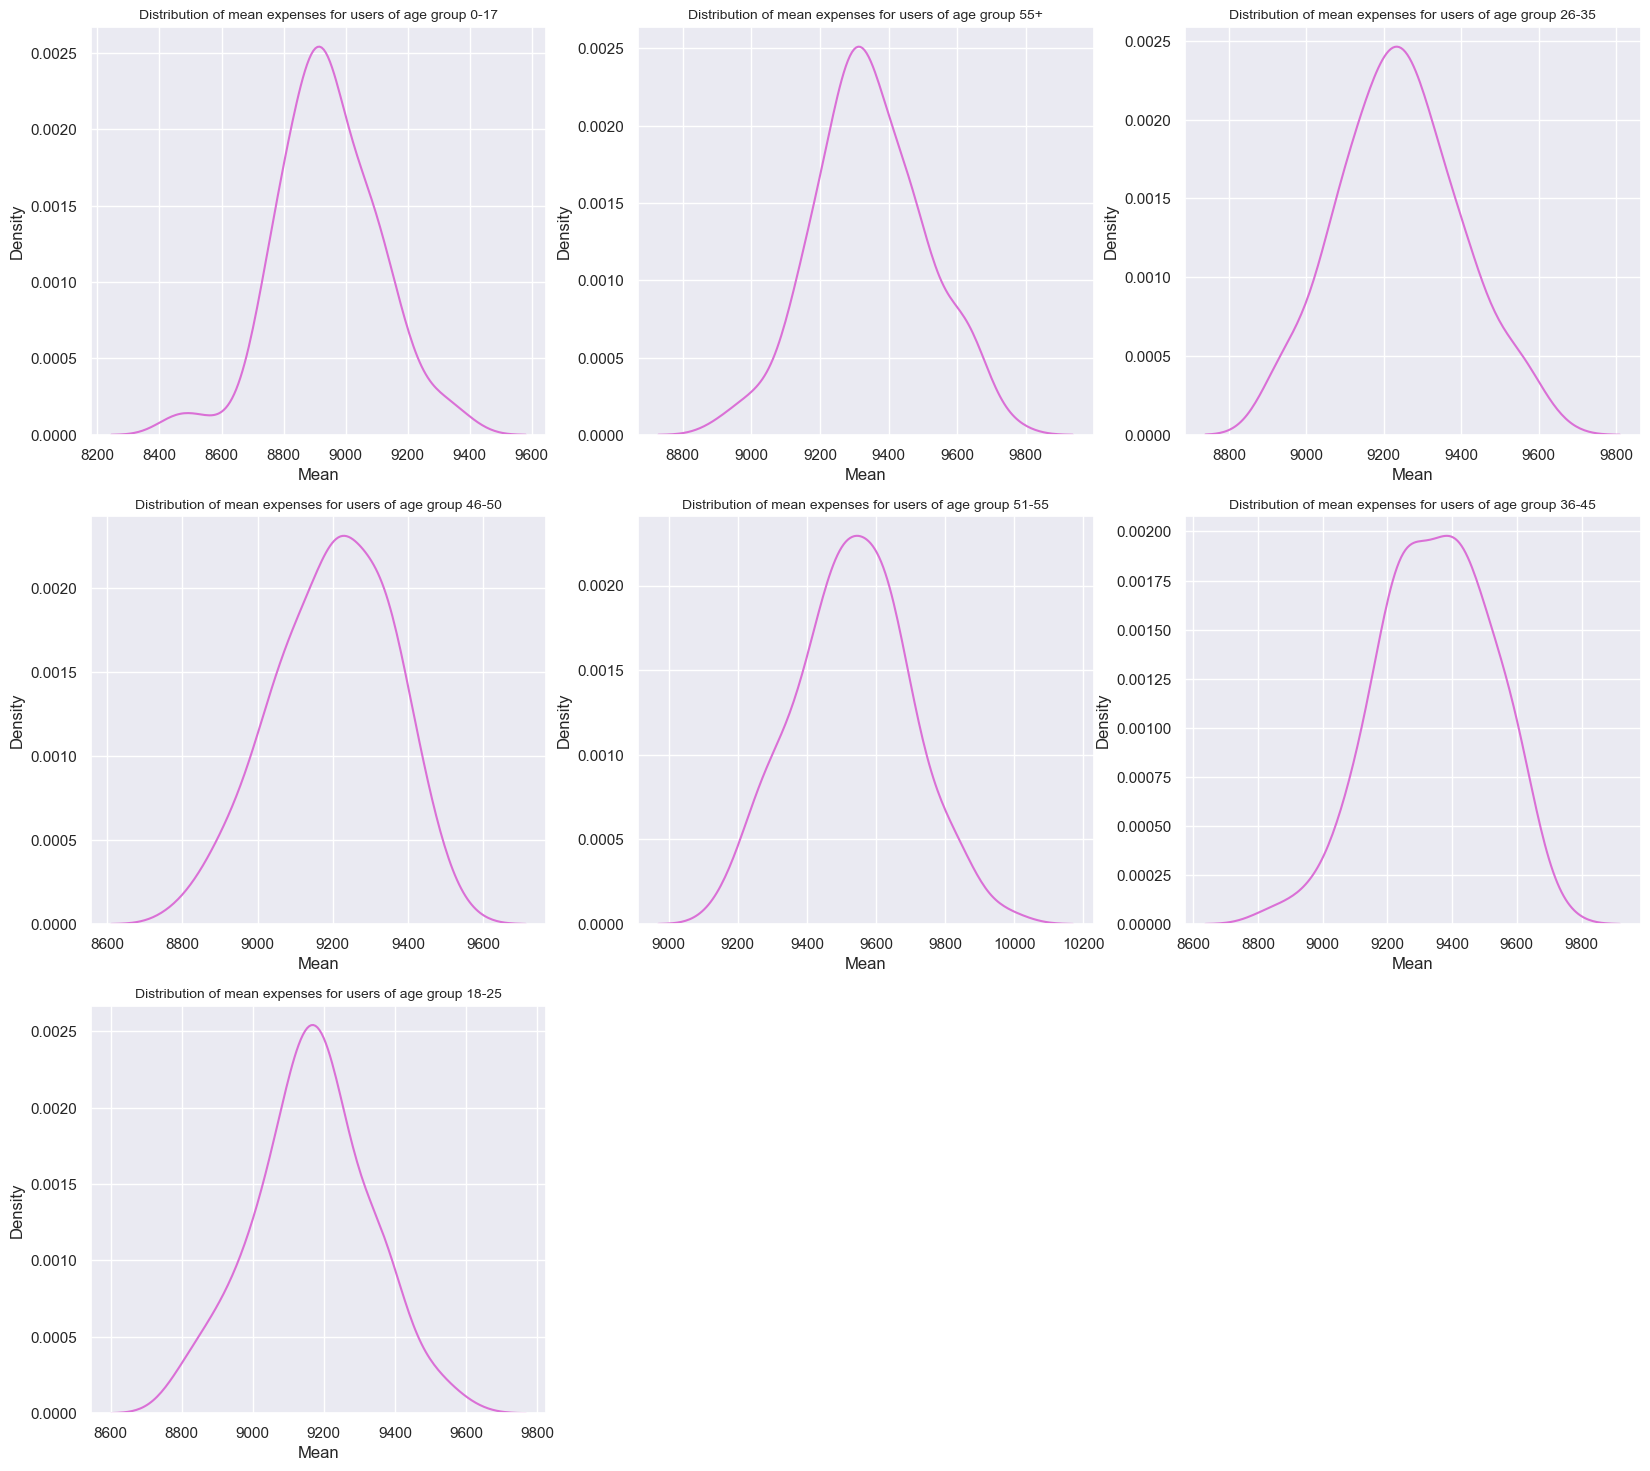

In [57]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(20,18))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=10)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [58]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For 0-17-
Mean of sample means = 8942.97412
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 163.0812200546269
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8462.43, 9353.83)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8618.18, 9289.93)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8720.39, 9191.99)
--------------------------------------------------
For 55+-
Mean of sample means = 9346.020279999999
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 159.5606078328283
Standard deviation of population = 5011.493995603418
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(8956.14, 9695.9)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9017.06, 9641.42)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9107.19, 9628.72)
------------------------

#### Observations:
1. 99% Confidence Interval for 0–17 is less than 51–55 without overlap.
2. We can say with 99% confidence that expense of 0–17 is less compared to expense of 51–55 ages.
   
#### Confidence Interval by Age
For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

#### 5. Overall Insights:

1. Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.
2. Ads can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
3. Ads can be targeted towards people of city category B. Inventory in these cities can be replenished.
4. Ads can be targeted towards people who have spent between 1 to 2 years in their cities.
5. Ads can be targeted towards unmarried people.
6. Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.
7. Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.
8. More products popular among people with occupations 0, 4 and 7 can be kept in store.
9. Ads for slightly expensive products can be targetted towards people with occupation 12 and 17. (See median expenses of all occupations below)
10. Ads for products which cost between 9151 and 9790 can be targetted towards males.
11. Ads for products which cost between 8507 and 9051 can be targetted towards females.
12. Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.
13. Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.

#### 6. Recommendations:
1. Walmart can give offers/rewards on purchases above 12000 to nudge customers to spend more.
2. Ads can be targeted towards people of city category B.
3. Ads should be targeted towards people who have spent between 1 to 2 years in their city.
4. Target ads towards unmarried people.
5. Target ads for products which cost between 9151 and 9790 towards males.
6. Target ads for products which cost between 8507 and 9051 towards females.
7. Target ads for products which cost between 9225 to 9908 towards 51–55 year old people.
8. Target ads for products which cost between 8611 to 9235 towards 0–17 year old people.

##### ************ END OF PROJECT *******************